In [420]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris

In [421]:
iris = load_iris(as_frame=True)

In [422]:
xdf = iris.data

In [423]:
ydf = iris.target

In [424]:
ydf

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: target, Length: 150, dtype: int64

In [425]:
target_names = iris.target_names
target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [426]:
features_name = iris.feature_names 

In [427]:
features_name

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

How SoftMax works?

When given an instance **x**, the sofmax regression model first computes a score $s_k(x)$ for each class *k*, then estimates the probability of each class by applying the *softmax function* to the score.

$s_k(x) = (\theta^{(k)})^T x$

Once we have the score for every class for the insance **x**, you can estimate the probability $\hat p_k$ that the instance belongs to class *k* by running the score through the softmax function.

$\hat p_k = \frac{\exp (s_k(x))}{\sum_{j=1}^k \exp (s_k(x))}$

In [428]:
Xtrain, Xtest, ytrain, ytest = [each_set.to_numpy() for each_set in train_test_split(xdf, ydf, test_size=0.2)]

In [429]:
def create_one_hot_encoder(arr, n_labels):
    m = len(arr)
    dummy_arr = np.zeros(shape=(m, n_labels))
    dummy_arr[np.arange(m), arr] = 1
    return dummy_arr

In [430]:
def add_dummy(index, arr):
    """
        Addes 1 to the 0th index of each row for the bias term.

        returns an (m, n+1) array
    """
    return np.insert(arr, 0, 1, axis=1)

In [431]:
class SoftMaxRegression:
    def __init__(self, seed=42, epsilon=1e-15):     
        self.seed = seed
        self.epsilon = epsilon
        self.theta_ = None        
        
    def initialise_theta(self, num_classes, num_features):
        np.random.seed(self.seed)
        if self.theta_ is None:
            self.theta_ = np.random.randn(num_classes, num_features)      

    def softmax_score(self, X):
        softmax_score = X @ self.theta_.T
        return softmax_score

    def softmax_probability(self, softmax_score):
        sum_of_exp = np.sum(np.exp(softmax_score), axis=1).reshape(-1,1)
        softmax_proba = np.exp(softmax_score)/sum_of_exp
        return softmax_proba
        
    def calculate_cost(self, y ,softmax_proba):
        loss = np.sum((y * np.log(softmax_proba + self.epsilon)), axis = 1)
        cost = -(np.mean(loss))
    
        return cost

    def get_softmax_gradient(self,X, y ,softmax_proba):
        err = softmax_proba - y
        gradient_ = np.sum(err[:, :, np.newaxis] * X[:, np.newaxis, :], axis=0)
        return gradient_/X.shape[0]

    def fit(self, X, y, alpha_=0.001, epoch=10000, play_plot=True):
        X = add_dummy(0, X)
        y = create_one_hot_encoder(y, 3)
        self.initialise_theta(num_classes = y.shape[1], num_features = X.shape[1])
        costs = []
        
        for iter_ in range(epoch):
            softmax_score = self.softmax_score(X)
            softmax_proba = self.softmax_probability(softmax_score)
            cost = self.calculate_cost(y, softmax_proba)
            gradient_ = self.get_softmax_gradient(X, y, softmax_proba)
            self.theta_ -= (alpha_ * gradient_)
            costs.append(cost)
            
            if iter_ % 1000 == 0:
                print(f'Epoch {iter_}, Cost: {cost:.4f}')
                
        if play_plot:
            plt.plot(range(len(costs)), costs)
            plt.xlabel("epoches")
            plt.ylabel("cost per epoch")
            plt.title("Cost vs. Epoch for Softmax Regression") 

    def predict(self, X):
        X = add_dummy(0, X)
        softmax_score = self.softmax_score(X)
        softmax_proba = self.softmax_probability(softmax_score)
        return np.argmax(softmax_proba, axis=1)

Epoch 0, Cost: 10.7909
Epoch 1000, Cost: 1.8013
Epoch 2000, Cost: 0.9382
Epoch 3000, Cost: 0.6937
Epoch 4000, Cost: 0.5962
Epoch 5000, Cost: 0.5408
Epoch 6000, Cost: 0.5026
Epoch 7000, Cost: 0.4734
Epoch 8000, Cost: 0.4495
Epoch 9000, Cost: 0.4293


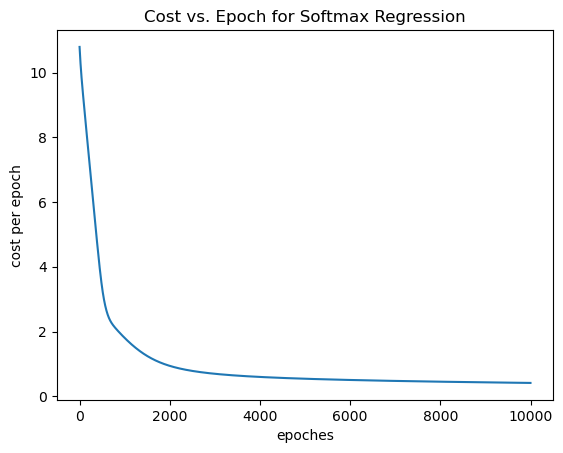

In [432]:
sm_reg = SoftMaxRegression()
sm_reg.fit(Xtrain, ytrain)

In [440]:
class ModelEvaluation:
    
    @staticmethod
    def accuracy_score(y_true, y_pred):
        y_true = y_true.flatten()
        m = len(y_true)
        correct_predictions = np.sum(y_true == y_pred)
        return correct_predictions/m

    @staticmethod
    def precision_score(y_true, y_pred):
        true_positives = np.sum((y_true == 1) & (y_pred == 1))
        false_positives = np.sum((y_true == 0) & (y_pred == 1))
        return true_positives / (true_positives + false_positives)


    staticmethod
    def recall_score(y_true, y_pred):
        
        true_positives = np.sum((y_true == 1) & (y_pred == 1))
        false_negatives = np.sum((y_true == 1) & (y_pred == 0))
        return true_positives / (true_positives + false_negatives)

    @staticmethod
    def f1_score_score(y_true, y_pred):
        
        precision_value = ClassificationMetrics.precision(y_true, y_pred)
        recall_value = ClassificationMetrics.recall(y_true, y_pred)
        return 2 * (precision_value * recall_value) / (precision_value + recall_value)

        
    

In [441]:
y_train_pred = sm_reg.predict(Xtrain)
print(f"Accuracy Score on Train Set: {ModelEvaluation.accuracy_score(ytrain, y_train_pred)*100}%")
print(f"Precision Score on Train Set: {ModelEvaluation.precision_score(ytrain, y_train_pred)*100}%")
print(f"Recall Score on Train Set: {ModelEvaluation.recall_score(ytrain, y_train_pred)*100}%")

Accuracy Score on Train Set: 91.66666666666666%
Precision Score on Train Set: 100.0%
Recall Score on Train Set: 100.0%


In [442]:
y_test_pred = sm_reg.predict(Xtest)

In [443]:
print(f"Accuracy Score on Test Set: {ModelEvaluation.accuracy_score(ytest, y_test_pred)*100}%")
print(f"Precision Score on Test Set: {ModelEvaluation.precision_score(ytest, y_test_pred)*100}%")
print(f"Recall Score on Test Set: {ModelEvaluation.recall_score(ytest, y_test_pred)*100}%")

Accuracy Score on Test Set: 90.0%
Precision Score on Test Set: 100.0%
Recall Score on Test Set: 100.0%
